<a href="https://colab.research.google.com/github/xeromark/TareasIA/blob/main/TareaIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerrequisitos

Para usar la librería de python de bnlearn es necesario instalarla con
el siguiente comando por la terminal:



In [ ]:
pip install bnlearn

# Método Exhaustivesearch

Exhaustivesearch determina todas las posibles estructuras de red bayesiana en un conjunto de datos para seleccionar la estructura que se adecue mejor estos. Por lo tanto, este método garantiza encontrar la estructura más óptima a costa de usar muchos recursos computacionales de la máquina en donde se utiliza.


## Funcionamiento

In [ ]:
import bnlearn as bn
from tabulate import tabulate
import pandas as pd

df = pd.read_csv('dataset.csv')

model = bn.structure_learning.fit(df, methodtype='ex', scoretype='bic')

model = bn.independence_test(model, df, alpha=0.05, prune=True)

print(tabulate(model['independence_test'], tablefmt="grid", headers="keys"))
bn.plot(model)

# Método Hillclimbsearch

HillClimbSearch es un algoritmo de búsqueda heurística que intenta encontrar la mejor estructura de la red bayesiana dado un conjunto de datos. Para ello, implementa una búsqueda local que comienza desde el inicio del DAG y continúa realizando iterativamente manipulaciones de un solo borde que aumentan al máximo la puntuación con los cuales se van categorizando la mejor estructura.

In [ ]:
import bnlearn as bn
import pandas as pd
from tabulate import tabulate

df = pd.read_csv('dataset.csv')

model = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')

G = bn.plot(model)

model1 = bn.independence_test(model, df, alpha=0.05, prune=False)
bn.plot(model1, pos=G['pos'])

print(tabulate(model1['independence_test'], headers="keys"))



# Pregunta 2


## **a)** Suponga que se empieza escuchando una canción del gran Yngwie Malmsteen. Realizar un random-walk, a partir del punto anterior, reportando a través de gráficos de líneas, como cambian las probabilidades de escuchar una canción de algunos de los grupos mencionados anteriormente. Dicho random-walk debe ser generado hasta llegar a una convergencia definida por usted, a través de un parámetro de usuario epsilon. Analizar los resultados obtenidos.

A continuación se muestra un código de Python que permite ver el cambio de las probabilidades de escuchar cierta canción. Además, se ha seleccionado un epsilon de 10 debido a que converge a un punto en donde su valor no varía demaciado (Solo varía en cifras no significativas). Por lo tanto, se analizarán los grupos G1, G3, G5, G7 y G9.

+----------+----------+----------+----------+-----------+
|       G1 |       G4 |       G5 |       G7 |        G9 |
+==========+==========+==========+==========+===========+
| 0.18     | 0.2      | 0.15     | 0.05     | 0.05      |
+----------+----------+----------+----------+-----------+
| 0.1459   | 0.1923   | 0.09     | 0.1424   | 0.0694    |
+----------+----------+----------+----------+-----------+
| 0.129182 | 0.175733 | 0.107083 | 0.141869 | 0.076     |
+----------+----------+----------+----------+-----------+
| 0.130118 | 0.171547 | 0.110459 | 0.137356 | 0.0763116 |
+----------+----------+----------+----------+-----------+
| 0.13139  | 0.171136 | 0.110199 | 0.136811 | 0.0762651 |
+----------+----------+----------+----------+-----------+
| 0.131613 | 0.171114 | 0.110067 | 0.13687  | 0.0762778 |
+----------+----------+----------+----------+-----------+
| 0.131623 | 0.171098 | 0.110063 | 0.136883 | 0.0762861 |
+----------+----------+----------+----------+-----------+
| 0.131624 | 0

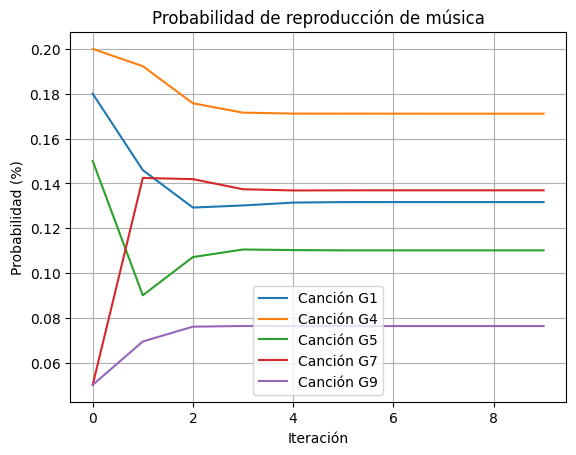

In [9]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

# matriz de Transición de cada distribución de probabilidad
Matriz_T = np.array([
   #  G1    G2    G3    G4    G5    G6    G7    G8    G9
    [0.25, 0.06, 0.08, 0.15, 0.04, 0.02, 0.15, 0.15, 0.10],  # G1
    [0.15, 0.15, 0.10, 0.22, 0.01, 0.02, 0.15, 0.10, 0.10],  # G2
    [0.12, 0.00, 0.05, 0.24, 0.14, 0.04, 0.27, 0.07, 0.07],  # G3
    [0.05, 0.13, 0.05, 0.30, 0.10, 0.10, 0.22, 0.05, 0.00],  # G4
    [0.18, 0.20, 0.07, 0.20, 0.15, 0.05, 0.05, 0.05, 0.05],  # G5
    [0.20, 0.10, 0.20, 0.05, 0.05, 0.10, 0.02, 0.15, 0.13],  # G6
    [0.01, 0.05, 0.15, 0.14, 0.17, 0.10, 0.12, 0.10, 0.16],  # G7
    [0.17, 0.15, 0.07, 0.07, 0.15, 0.10, 0.12, 0.09, 0.08],  # G8
    [0.13, 0.11, 0.13, 0.03, 0.20, 0.20, 0.04, 0.15, 0.01]   # G9
])

### Declaracion de variables
estadoActual = [0, 0, 0, 0, 1, 0, 0, 0, 0]
temporal = [] #lista vacia para guardar los datos.
fs = [0,3,4,6,8] # Filas Seleccionadas para mostrar, en este caso G1, G3. G5, G7, G9
Epsilon = 10 # Parámetro Epsilon solicitado, solo serán 10 iteraciones porque con un mayor valor varía poco

### Lógica del random-walk
for i in range(Epsilon):
   estadoActual = np.dot(estadoActual , Matriz_T) # Acumula el estado actual con el siguiente
   temporal.append(estadoActual) # Con cada iteracion se alamcena su resultado acumulado

temporal = np.array(temporal) # Lo pasamos a una lista de array de tipo enteros no tuplas

# Se muestran y grafican los resultados obtenidos
for i in fs:
  plt.plot(temporal[: , i], label=f'Canción G{i+1}')

# Mostrar la tabla tabulada asociada al grafico
print(tabulate(temporal[:, fs], headers=["G1","G4","G5","G7","G9"], tablefmt="grid"))

plt.xlabel('Iteración')
plt.ylabel('Probabilidad (%)')
plt.title('Probabilidad de reproducción de música')
plt.legend()
plt.grid(True)
plt.show()

Tal y como se puede ver al compilar el código de python, los grupos convergen a los siguientes valores:

* G1 = 0.131626
* G4 = 0.171091
* G5 = 0.110066
* G7 = 0.136879
* G9 = 0.0762878



Estos resultados nos indican cual de ellos es más probable de ser escuchado a largo plazo. En este caso podemos ver que quien tiene el valor más alto **dentro del grupo escogido** lo tiene G4 que corresponde a *Rhapsody of fire* con una probabilidad de 0.171091.

Por lo tanto, una persona que deje la Playlist sonando por un tiempo determinado lo más probable es que se escuchen canciones provenientes de *Rhapsody of fire*.

---

## **b)** Determinar la distribución estacionaria de la cadena de Markov, usando para ello un método analítico. Compare y analice con los resultados obtenidos en el punto **(a)**

Para calcular la distribución estacionaria de la cadena de Markov de forma analítica se debe recordar lo siguiente visto en clases:

1.   πT = π
2.   π1 + π2 + π3 + ... + πn = 1  ;  n ∈ ℤ




El punto **(1)** sugiere que la probabilidad de estar en un estado estacionario π no cambiará por más que se le aplique la matriz de transición.

El punto **(2)** se refiere que la sumatoria de las probabilidades πn en el estado estacionario es igual a 1

---

* Por lo tanto, se sabe que:

![Descripción de la imagen](https://drive.google.com/uc?id=1BuK7EpKO1e-cYfnwdmlK1w0zyji0WrKi)


Luego se tiene que πT = π y la matriz se lleva a un sistema de ecuaciones:


![Descripción de la imagen](https://drive.google.com/uc?id=1cmKVuV28IvIzGFpu1jztseBPVSj104PD)


Recordando la restricción del punto **(2)**, todas las **Gn** deben sumar 1 en total quedando finalmente como la siguiente figura:

![Descripción de la imagen](https://drive.google.com/uc?id=1-fTDJ-_geeCeX5YXX6_gg7iYJlfrZZge)


Al resolver este sistema de ecuación lineal se obtienen los siguientes valores:

* G1 = 0.13162585
* G2 = 0.10540776
* G3 = 0.09476106
* G4 = 0.17109049
* G5 = 0.11006619
* G6 = 0.07747712
* G7 = 0.13687884
* G8 = 0.09640483
* G9 = 0.07628785


Ahora se hará una tabla comparativa en donde se podrán a preciar los valores calculados a partir de iteraciones y al calcular de forma analítica de la distribución estacionaria de la cadena de Markov:

<table>
  <tr>
    <th>Grupo</th>
    <th>Random-Walk</th>
    <th>Distribución estacionaria</th>
    <td>Precisión %</td>

  </tr>
  <tr>
    <td>G1</td>
    <td>0,131626</td>
    <td>0,13162585</td>
    <td>≈ 1,13 * 10^-4 % </td>

  </tr>
  <tr>
    <td>G4</td>
    <td>0,171091 </td>
    <td>0,17109049</td>
    <td>≈ 2,98 * 10^-4 % </td>

  </tr>
  <tr>
    <td>G5</td>
    <td>0,110066</td>
    <td>0,11006619</td>
    <td>≈ 1,72 * 10^-4 % </td>

  </tr>
  <tr>
    <td>G7</td>
    <td>0,136879</td>
    <td>0,13687884</td>
    <td>≈ 1,16 * 10^-4 % </td>

  </tr>
    <tr>
    <td>G9</td>
    <td>0,0762878</td>
    <td>0,07628785</td>
    <td>≈ 6,55 * 10^-5 % </td>

  </tr>
</table>

Como se puede apreciar en la tabla, los valores de las probabilidades de cada grupo calculados a partir de 10 iteraciones se aproximan demaciado a los calculados de forma analítica. Cabe a mencionar que el error porcentual (%) en todos los casos vistos en la tabla, no superan el 0,01%, por lo que se concluye que a partir de las 10 iteraciones solo son afectadas las cífras menos significativas.
